# Setup

In [1]:
library(popsom)
library(ggplot2)

In [2]:
source('/home/ec2-user/SageMaker/popsom/R/map-utils.R')

Loading required package: som
Loading required package: class
Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 


In [3]:
# a function that searches for the best model

library(popsom)

train.maps <- function(dataset, labels, xsize, ysize) {

    num_train <- c()
    convergs <- c()

    best_map <- NULL
    best_converg = 0
    best_train = 0
    best_timr = 0

    # find the best map
    for(i in seq(1,5))
    {
      for(i in list(10,100,1000,10000,50000,100000,200000,400000))
      {
        start_time = Sys.time()
        ms = map.build(dataset, 
                       labels = labels, 
                       xdim = xsize, 
                       ydim = ysize, 
                       alpha=0.3,
                       train = i,
                       algorithm="vsom")
        end_time = Sys.time()
        delta_time = end_time - start_time

        converg = map.convergence(ms,ks=TRUE)
        num_train = c(num_train,i)
        convergs = c(convergs,converg)
        #print(converg)
      
        if (converg > best_converg) {
            best_map = ms
            best_converg = converg
            best_train = i
            best_time = delta_time
        }
      }
    }

    # gather convergence data
    conv_data <- data.frame(num_train,convergs)
        
    list(data=conv_data, 
         map=best_map, 
         conv=best_converg, 
         train=best_train,
         time=best_time)
}

In [4]:
# plot convergence accuracy based on convergence data
library(ggplot2)

plot.convergence <- function (plot_data, name) {
    ggplot(plot_data,aes(x = log2(num_train), y = convergs)) +
        geom_point() +
        ylim(0,1)  +
        labs(title = paste(name,'Convergence Accuracy'),x= 'log2(Iterations)', y = 'Value') +
        stat_smooth(method = lm, formula = y ~ poly(x, 3)) +
        theme_bw() + theme(plot.title = element_text(hjust = 0.5))
}

In [5]:
# generate an index vector for sampling test data and its labels

data_label <- read.csv('dataset/dim064_test_label.csv')
rows <- nrow(data_label)

# 10% of original data
#ix <- sample(rows, as.integer(rows/100)*10)

ix <- sample(rows, as.integer(100))




# SOM Map size for this Notebook

In [6]:
x = 25
y = 20

# SOM with original data

In [7]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('dataset/dim064_test.csv')


In [8]:
#data_label <- data_label[ix,]
#data <- data[ix,]
nrow(data)
ncol(data)

[1] 410

[1] 64

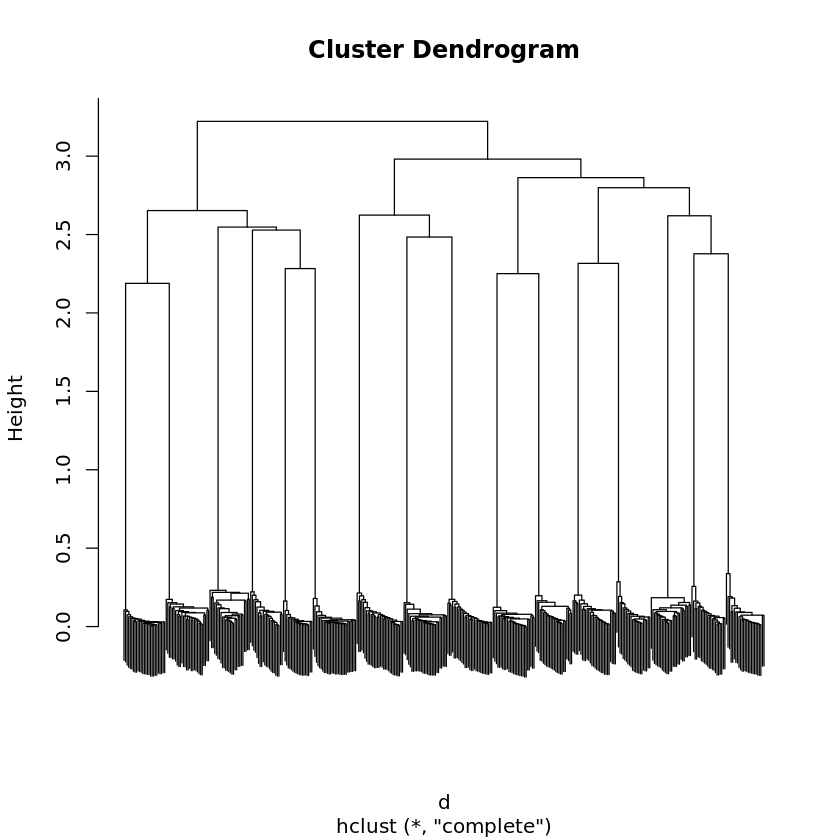

In [9]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
#plot(hc, labels=data_label, cex=.5)
plot(hc, labels=FALSE)

In [10]:
results = train.maps(data,data.frame(data_label),x,y)

In [11]:
avg.homogeneity(results$map)

$homog
[1] 0.9170732

$nclust
[1] 15

In [12]:
results$time

Time difference of 20.74692 secs

In [13]:
results$conv

[1] 0.7849454

In [14]:
results$train

[1] 4e+05

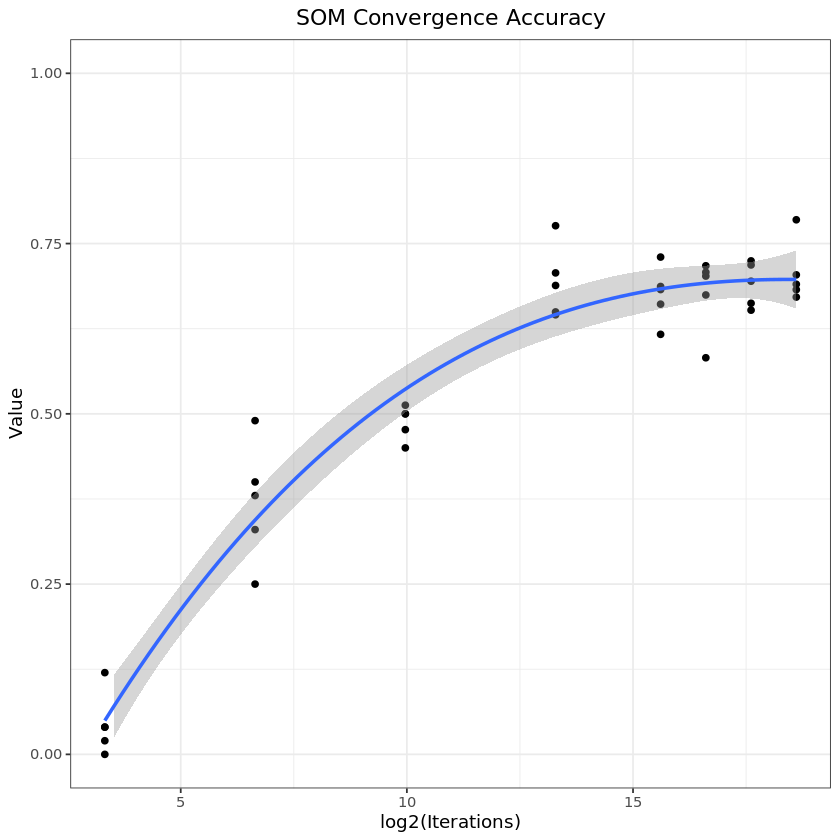

In [15]:
plot.convergence(results$data, 'SOM')

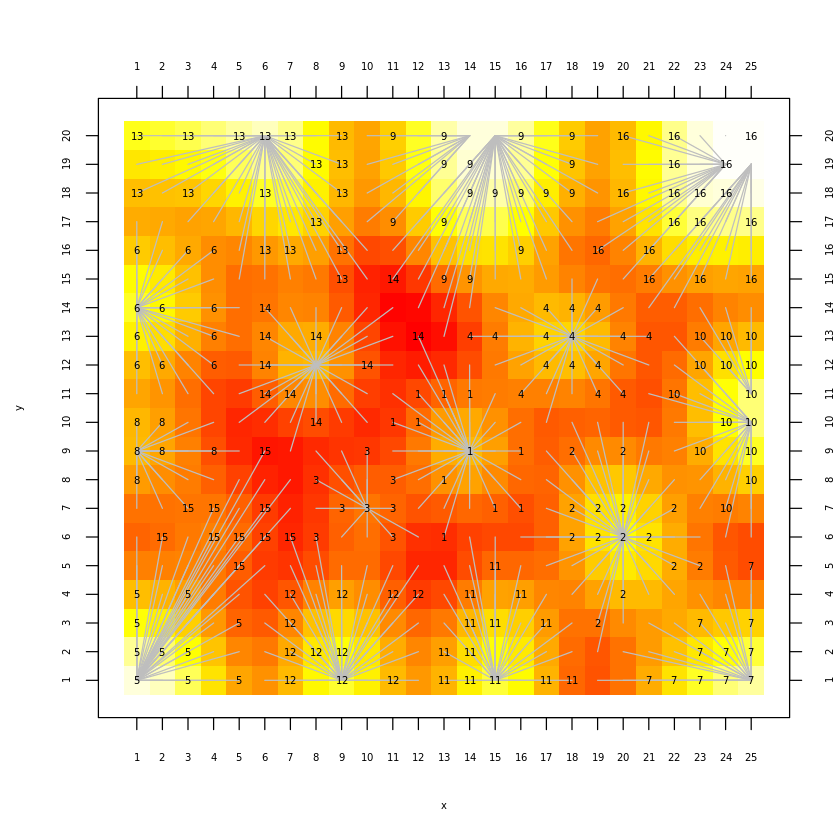

In [16]:
map.starburst(results$map)

# Basic Autoencoder

In [17]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('output/dim064_AE_encoded.csv')
nrow(data)
ncol(data)

[1] 410

[1] 11

In [18]:
#data_label <- data_label[ix,]
#data <- data[ix,]
nrow(data)
ncol(data)

[1] 410

[1] 11

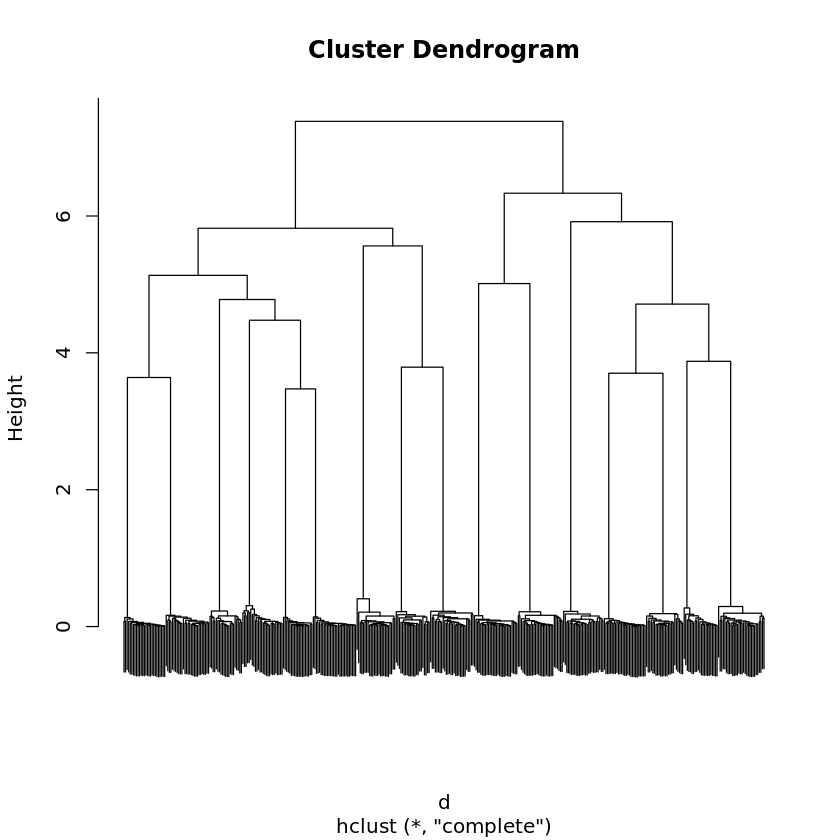

In [19]:
d <- dist(as.matrix(data))   
hc <- hclust(d)                
#plot(hc, labels=data_label)
plot(hc, labels=FALSE)

In [20]:
results = train.maps(data,data.frame(data_label),x,y)

In [21]:
avg.homogeneity(results$map)

$homog
[1] 1

$nclust
[1] 16

In [22]:
results$time

Time difference of 1.181399 secs

In [23]:
results$train

[1] 10000

In [24]:
results$conv

[1] 0.8657876

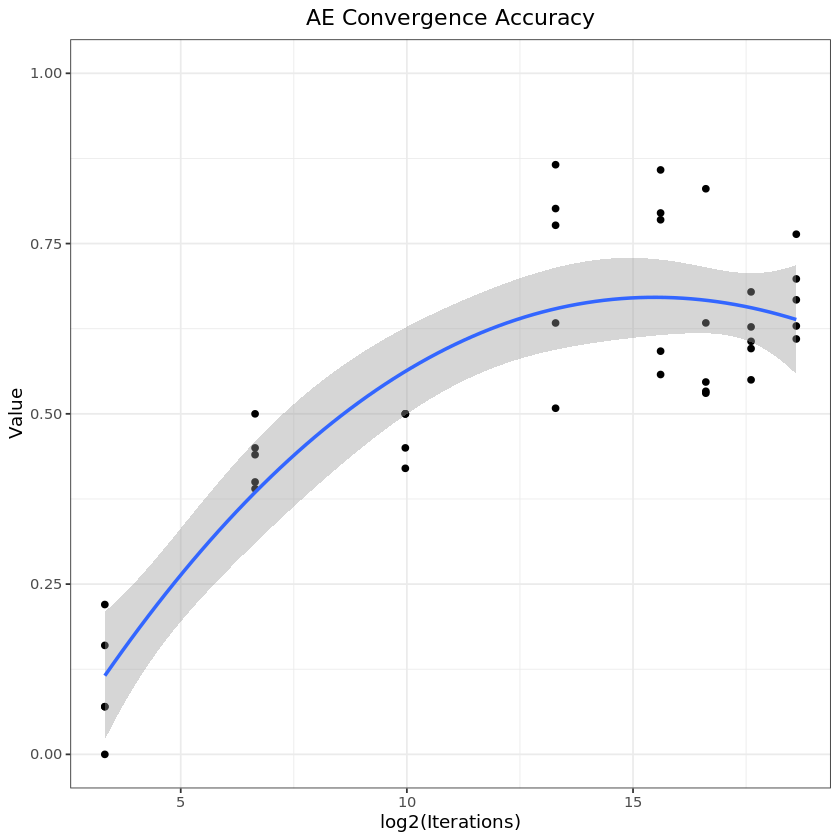

In [25]:
plot.convergence(results$data, 'AE')

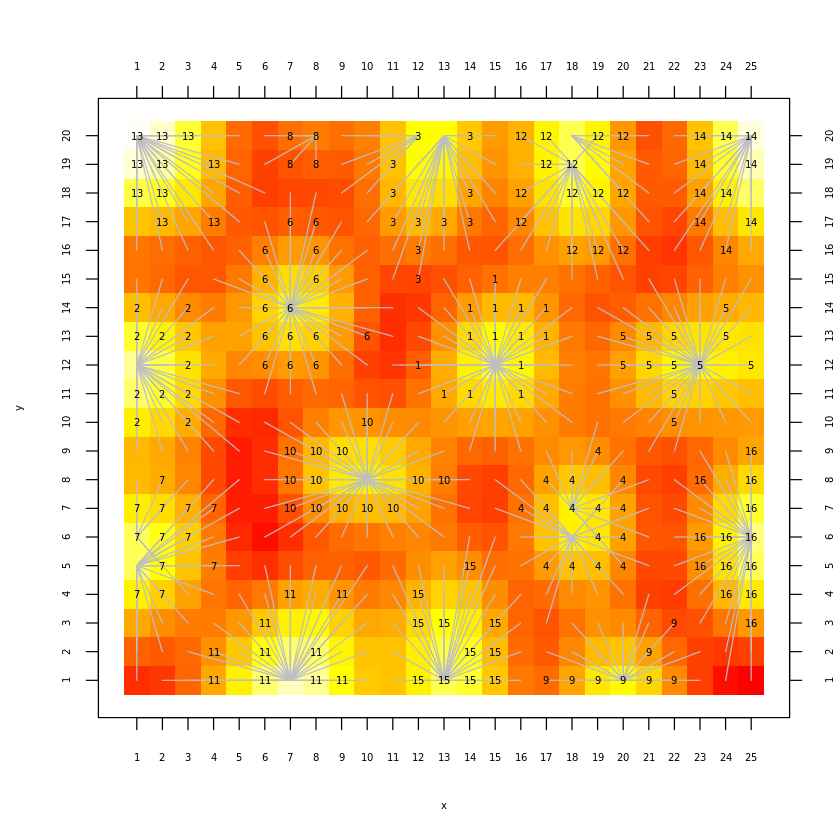

In [26]:
map.starburst(results$map)

# Sparse Autoencoder

In [27]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('output/dim064_SAE_encoded.csv')

In [28]:
#data_label <- data_label[ix,]
#data <- data[ix,]
nrow(data)
ncol(data)

[1] 410

[1] 7

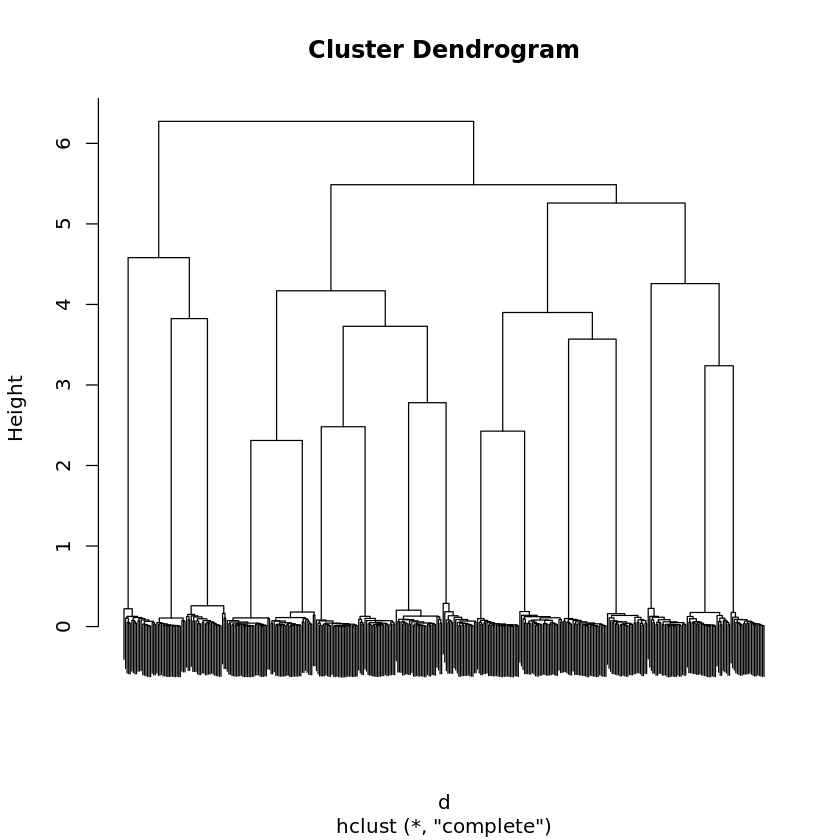

In [29]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
plot(hc, labels=FALSE)

In [30]:
results = train.maps(data,data.frame(data_label),x,y)

In [31]:
avg.homogeneity(results$map)

$homog
[1] 0.8317073

$nclust
[1] 13

In [32]:
results$time

Time difference of 0.5177093 secs

In [33]:
results$train

[1] 1000

In [34]:
results$conv

[1] 0.5

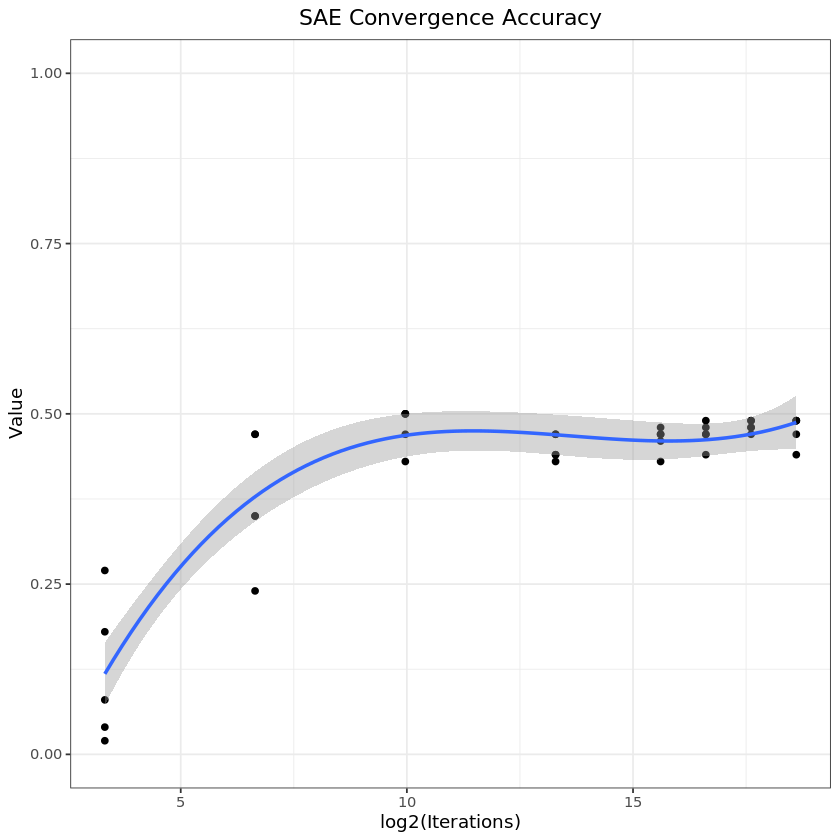

In [35]:
plot.convergence(results$data, 'SAE')

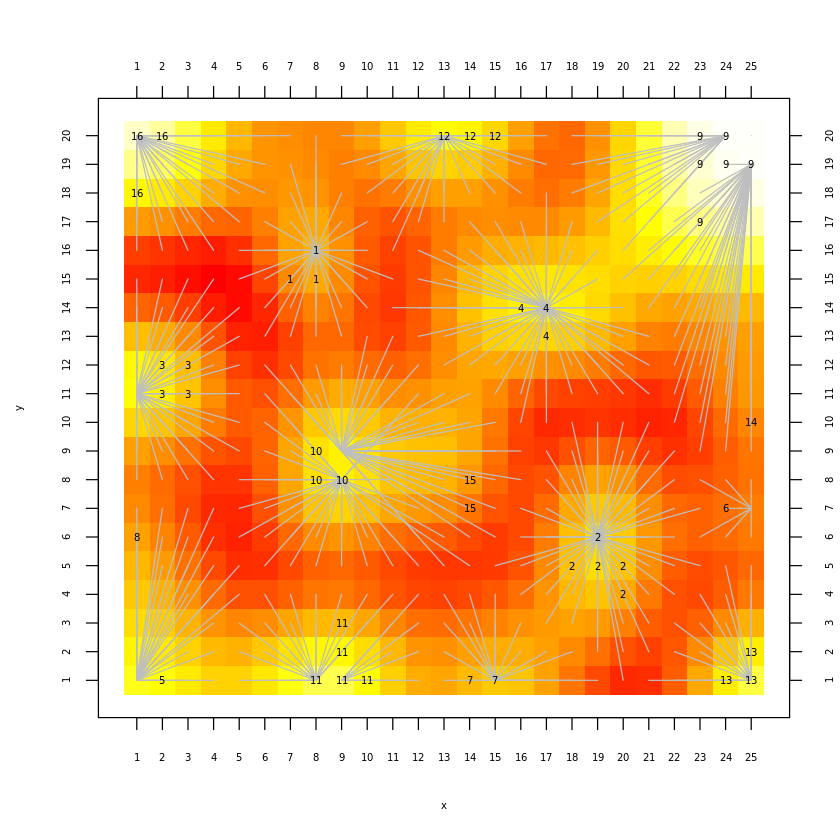

In [36]:
map.starburst(results$map)

# Contractive Autoencoder

In [37]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('output/dim064_CAE_encoded.csv')

In [38]:
#data_label <- data_label[ix,]
#data <- data[ix,]
nrow(data)
ncol(data)

[1] 410

[1] 9

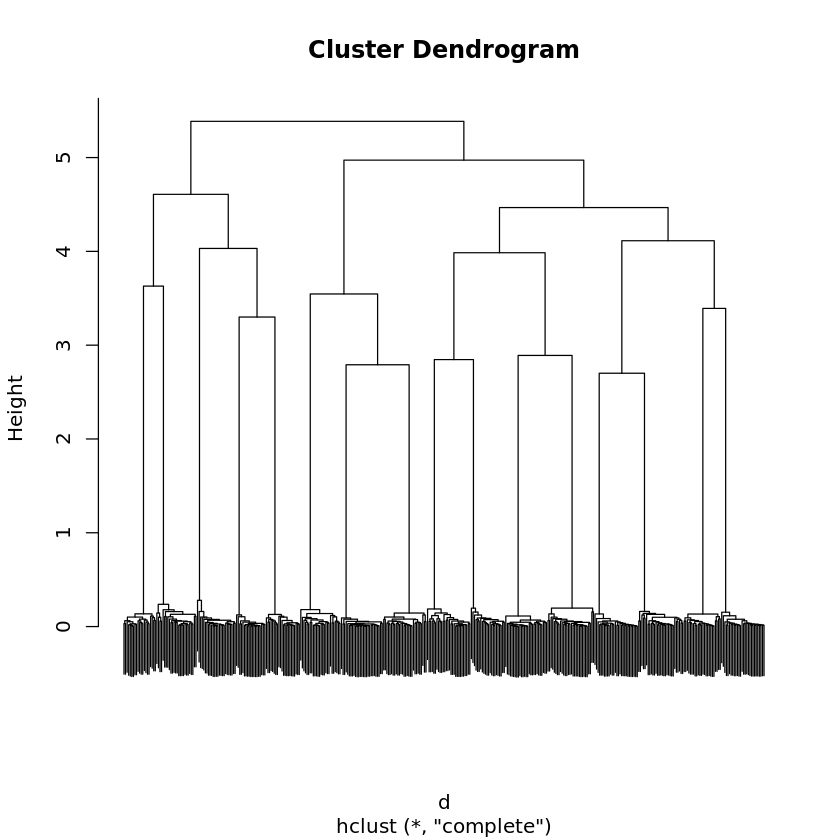

In [39]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
#plot(hc, labels=data_label)
plot(hc, labels=FALSE)

In [40]:
results = train.maps(data,data.frame(data_label),x,y)

In [41]:
avg.homogeneity(results$map)

$homog
[1] 1

$nclust
[1] 16

In [42]:
results$time

Time difference of 0.682122 secs

In [43]:
results$train

[1] 10000

In [44]:
results$conv

[1] 0.5311253

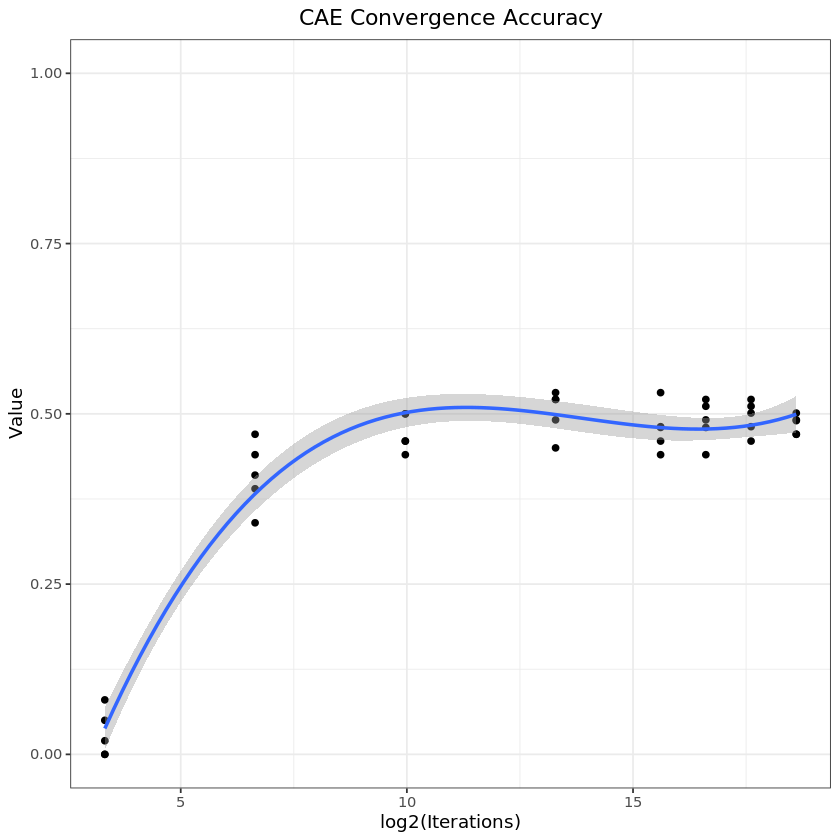

In [45]:
plot.convergence(results$data, 'CAE')

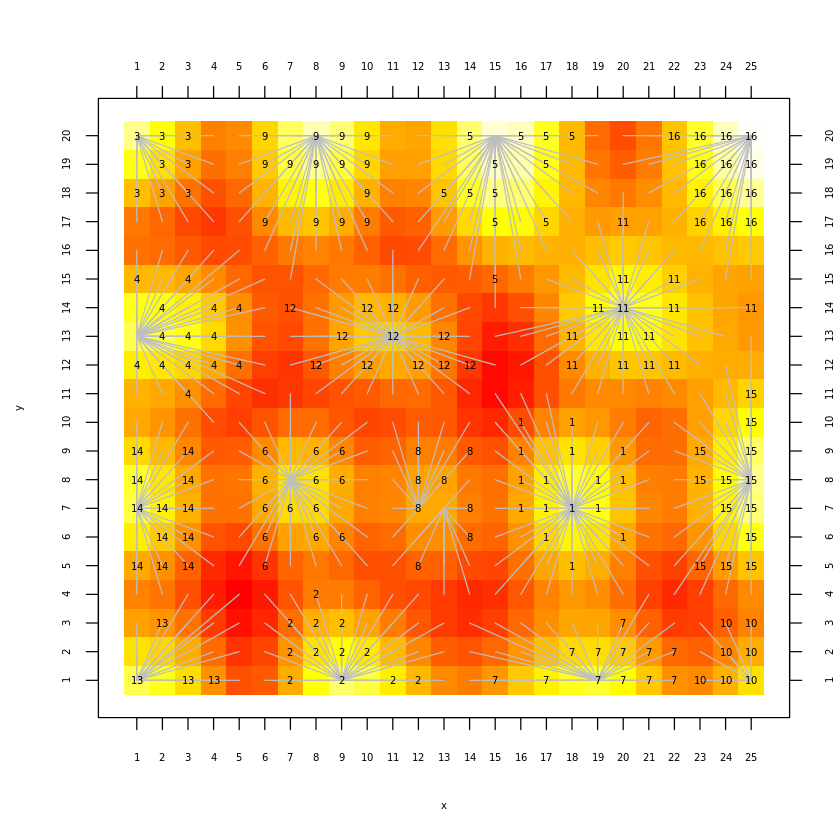

In [46]:
map.starburst(results$map)

# Denoising Autoencoder

In [47]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('output/dim064_DAE_encoded.csv')

In [48]:
#data_label <- data_label[ix,]
#data <- data[ix,]
nrow(data)
ncol(data)

[1] 410

[1] 12

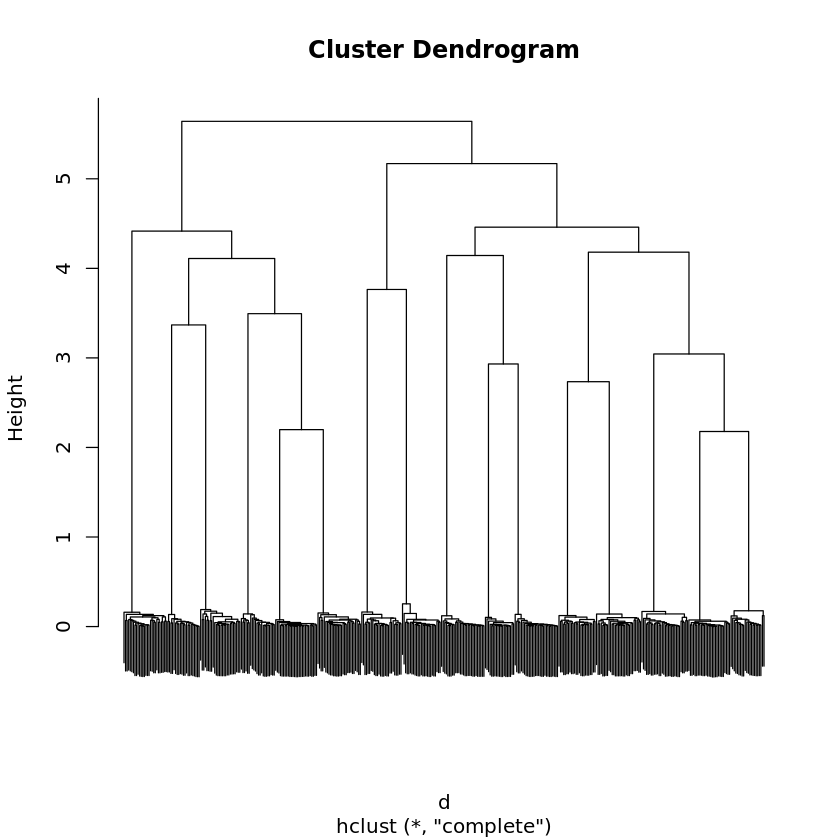

In [49]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
#plot(hc, labels=data_label)
plot(hc, labels=FALSE)

In [50]:
results = train.maps(data,data.frame(data_label),x,y)

In [51]:
avg.homogeneity(results$map)

$homog
[1] 0.9756098

$nclust
[1] 16

In [52]:
results$time

Time difference of 1.819762 secs

In [53]:
results$train

[1] 1e+05

In [54]:
results$conv

[1] 0.6612879

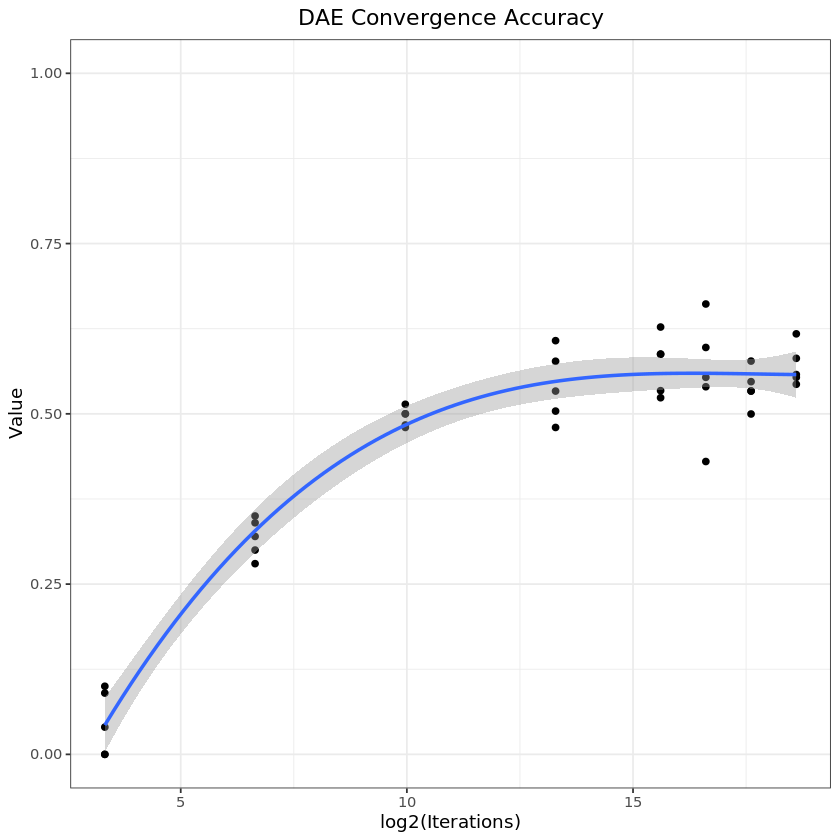

In [55]:
plot.convergence(results$data, 'DAE')

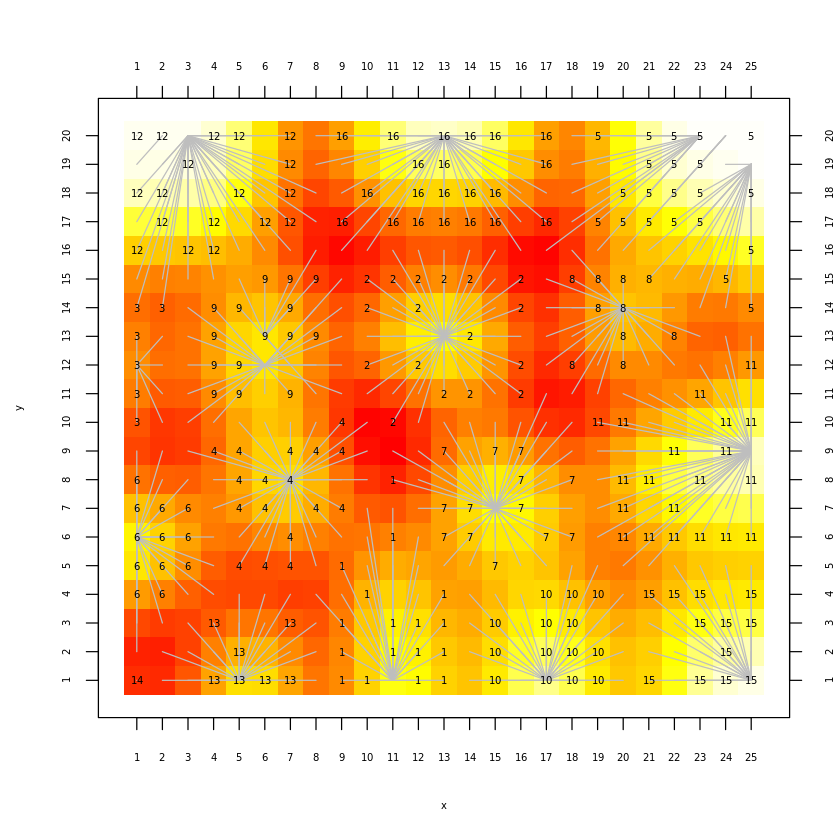

In [56]:
map.starburst(results$map)

# Convolutional Autoencoder

In [57]:
data_label <- read.csv('dataset/dim064_test_label.csv')
data <- read.csv('output/dim064_ConAE_encoded.csv')

In [58]:
#data_label <- data_label[ix,]
#data <- data[ix,]
nrow(data)
ncol(data)

[1] 410

[1] 8

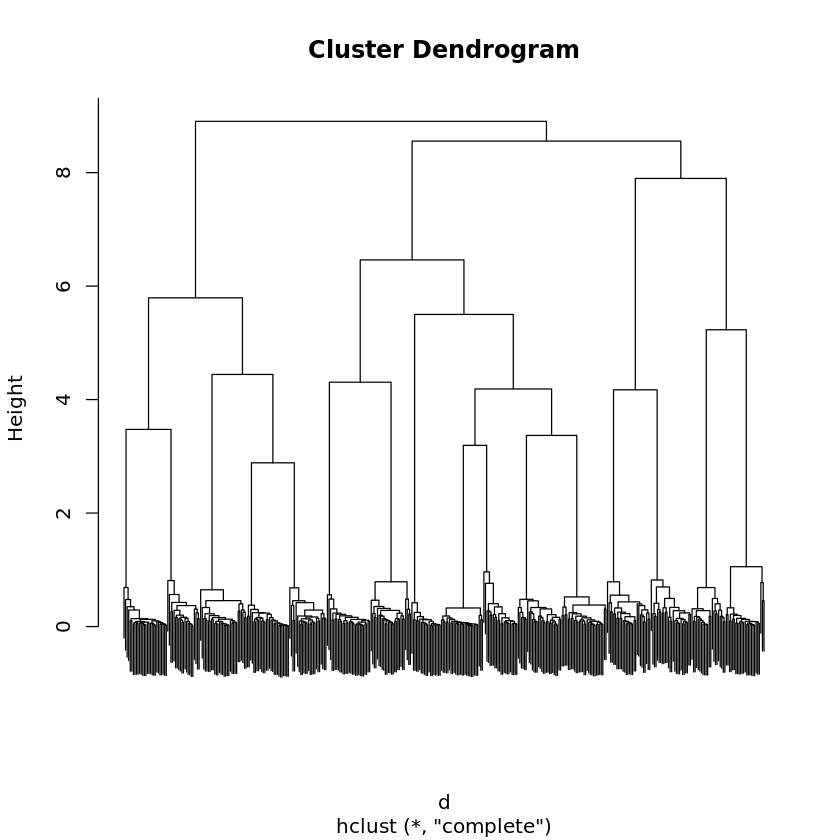

In [59]:
d <- dist(as.matrix(data))   # find distance matrix 
hc <- hclust(d)                # apply hirarchical clustering 
#plot(hc, labels=data_label)
plot(hc, labels=FALSE)

In [60]:
results = train.maps(data,data.frame(data_label),x,y)

In [61]:
avg.homogeneity(results$map)

$homog
[1] 0.9268293

$nclust
[1] 15

In [62]:
results$time

Time difference of 1.173459 secs

In [63]:
results$train

[1] 1e+05

In [64]:
results$conv

[1] 0.99

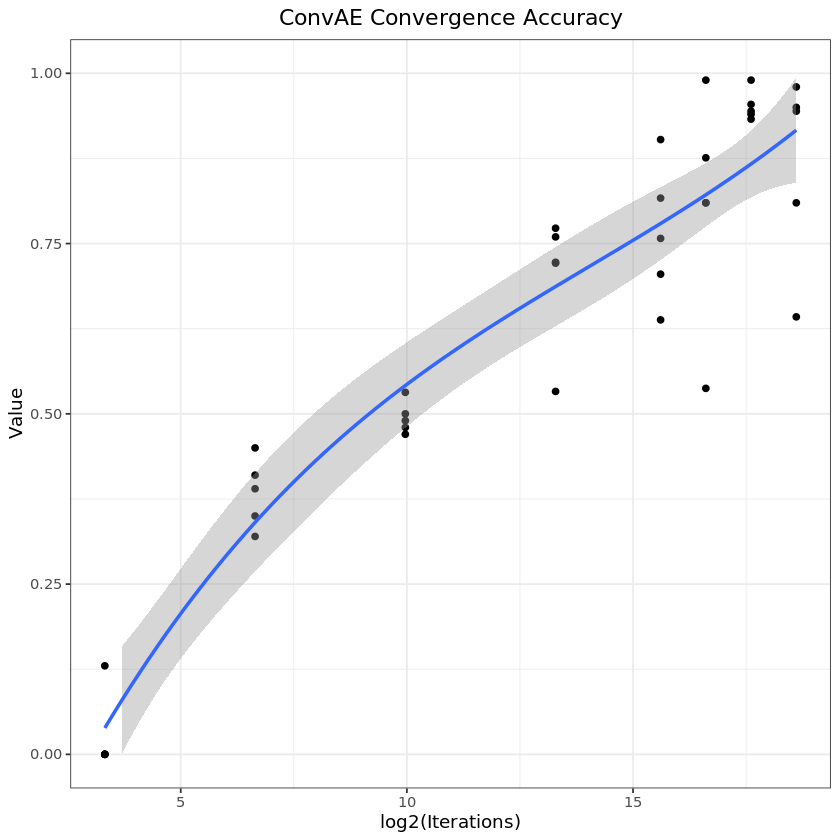

In [65]:
plot.convergence(results$data, 'ConvAE')

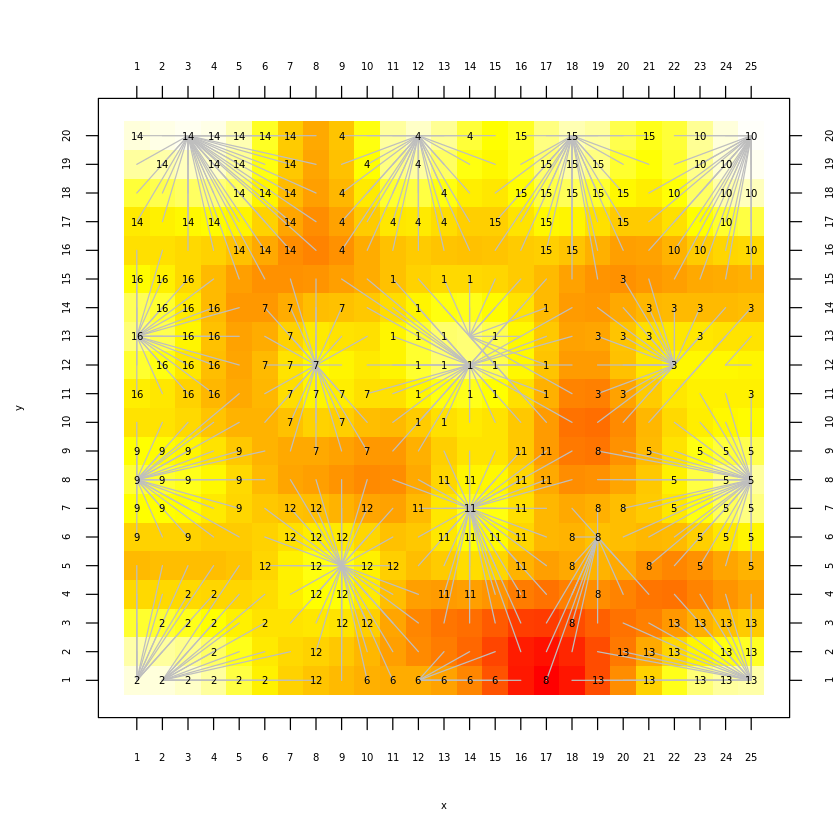

In [66]:
map.starburst(results$map)